In [3]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def custom_round(x, base=5):
    return int(base * round(float(x)/base))


df = pd.read_csv('ShotChartDetail_v2.csv')
df['LOC_X_round'] = df['LOC_X'].apply(lambda x: custom_round(x, base=20))
df['LOC_Y_round'] = df['LOC_Y'].apply(lambda x: custom_round(x, base=20))
df.groupby(['TEAM_ID','SHOT_ZONE_BASIC']).mean()['SHOT_MADE_FLAG']

df['SHOT_ZONE_BASIC'].unique()


pbp = pd.read_csv('large_playbyplayv2_df.csv', index_col=0)
pbp


df[df['PLAYER_NAME'].str.contains('Sabonis')]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,run_date,LOC_X_round,LOC_Y_round
62436,Shot Chart Detail,21700004,141,1627734,Domantas Sabonis,1610612754,Indiana Pacers,1,1,35,...,1,14,1,1,20171018,IND,BKN,20191230,0,20
62437,Shot Chart Detail,21700004,171,1627734,Domantas Sabonis,1610612754,Indiana Pacers,2,11,31,...,34,46,1,1,20171018,IND,BKN,20191230,40,40
62438,Shot Chart Detail,21700004,175,1627734,Domantas Sabonis,1610612754,Indiana Pacers,2,11,15,...,2,13,1,1,20171018,IND,BKN,20191230,0,20
62439,Shot Chart Detail,21700004,460,1627734,Domantas Sabonis,1610612754,Indiana Pacers,3,4,21,...,-169,21,1,1,20171018,IND,BKN,20191230,-160,20
62440,Shot Chart Detail,21700004,498,1627734,Domantas Sabonis,1610612754,Indiana Pacers,3,2,37,...,5,12,1,1,20171018,IND,BKN,20191230,0,20
62441,Shot Chart Detail,21700004,553,1627734,Domantas Sabonis,1610612754,Indiana Pacers,4,10,25,...,0,5,1,1,20171018,IND,BKN,20191230,0,0
62442,Shot Chart Detail,21700004,562,1627734,Domantas Sabonis,1610612754,Indiana Pacers,4,9,37,...,-5,6,1,1,20171018,IND,BKN,20191230,0,0
62443,Shot Chart Detail,21700018,27,1627734,Domantas Sabonis,1610612754,Indiana Pacers,1,9,39,...,-144,20,1,1,20171020,IND,POR,20191230,-140,20
62444,Shot Chart Detail,21700018,72,1627734,Domantas Sabonis,1610612754,Indiana Pacers,1,5,5,...,0,-6,1,0,20171020,IND,POR,20191230,0,0
62445,Shot Chart Detail,21700018,282,1627734,Domantas Sabonis,1610612754,Indiana Pacers,2,0,58,...,-44,199,1,0,20171020,IND,POR,20191230,-40,200


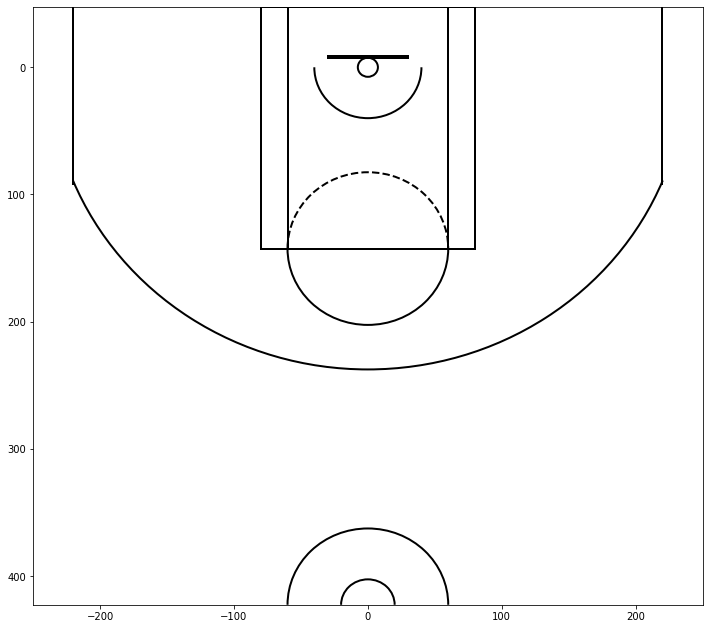

In [7]:




df['LOC_X_round'] = df['LOC_X'].apply(lambda x: custom_round(x, base=1))
df['LOC_Y_round'] = df['LOC_Y'].apply(lambda x: custom_round(x, base=1))

df['LOC_X_round'] = df['LOC_X']
df['LOC_Y_round'] = df['LOC_Y']


g =  df.groupby(['PLAYER_NAME','PLAYER_ID','LOC_X_round','LOC_Y_round']).size()
filtered = g[g>1].to_frame()
# filtered.groupby()
g =  df.groupby(['PLAYER_NAME','PLAYER_ID','LOC_X_round','LOC_Y_round'])
df_avg =g.mean()[['SHOT_MADE_FLAG']]
df_avg = df_avg.merge(filtered, how='inner' , left_index=True , right_index=True)

df_avg= df_avg.reset_index()
plt.figure(figsize=(12,11))

pv = df_avg[df_avg['PLAYER_ID']==203507].pivot_table(index='LOC_Y_round' , columns = 'LOC_X_round' , values='SHOT_MADE_FLAG')
# pv = pv.sort_index(ascending=False)
 
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# sns.heatmap(pv,vmin=0, vmax=1, cmap = cmap)

draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)


plt.show()


C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\212778050\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


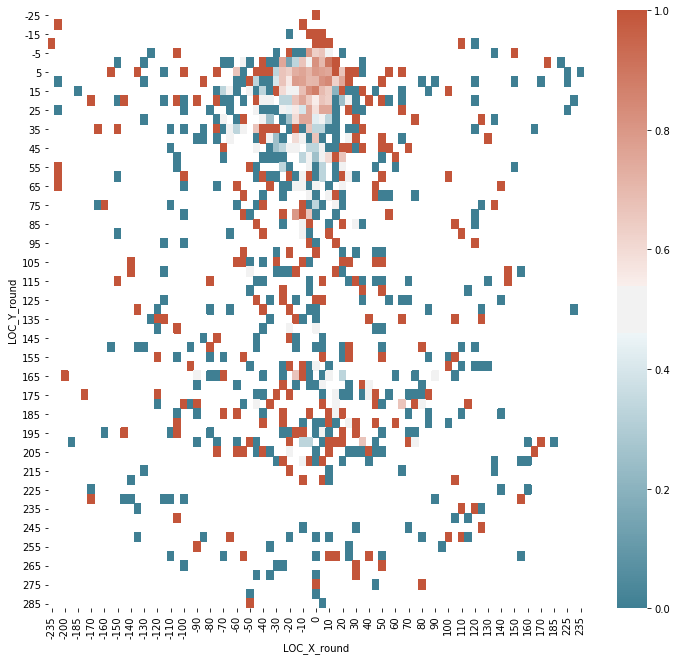

In [41]:
plt.figure(figsize=(12,11))

player_df = df[df['PLAYER_ID']==1627734]
player_df['LOC_X_round'] = player_df['LOC_X'].apply(lambda x: custom_round(x, base=5))
player_df['LOC_Y_round'] = player_df['LOC_Y'].apply(lambda x: custom_round(x, base=5))
gb = player_df.groupby(['LOC_X_round','LOC_Y_round']).mean()['SHOT_MADE_FLAG'].reset_index()

pv = gb.pivot_table(index='LOC_Y_round' , columns = 'LOC_X_round' , values = 'SHOT_MADE_FLAG')
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
ax = sns.heatmap(pv,vmin=0, vmax=1, cmap = cmap)
plt.show()



,PLAYER_NAME,PLAYER_ID,LOC_X_round,LOC_Y_round,SHOT_MADE_FLAG,0
5627,Giannis Antetokounmpo,203507,-236,16,0.5,2
5628,Giannis Antetokounmpo,203507,-180,193,0.0,2
5629,Giannis Antetokounmpo,203507,-128,235,0.5,2
5630,Giannis Antetokounmpo,203507,-124,221,0.5,2
5631,Giannis Antetokounmpo,203507,-81,246,0.0,2


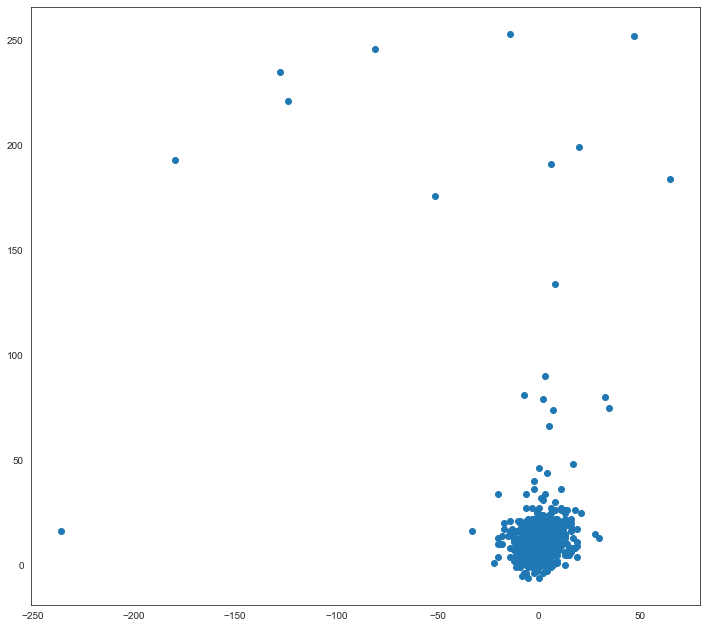

In [69]:
shot_df = df_avg[df_avg['PLAYER_ID']==1627734]
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(shot_df.head())
    
shot_df    
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(shot_df.LOC_X_round, shot_df.LOC_Y_round)
plt.show()

In [6]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

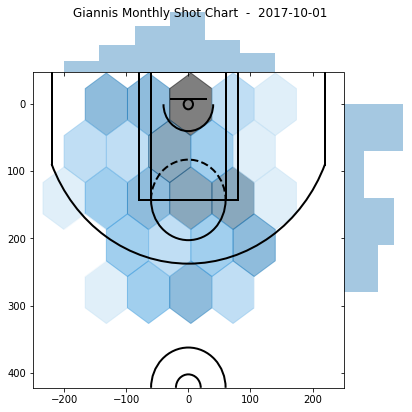

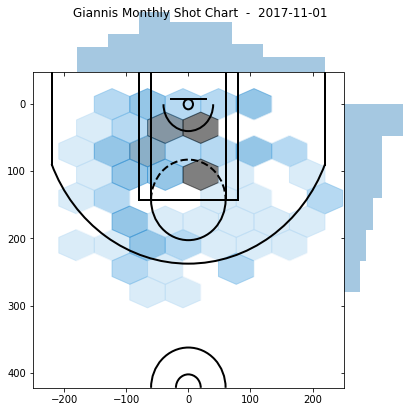

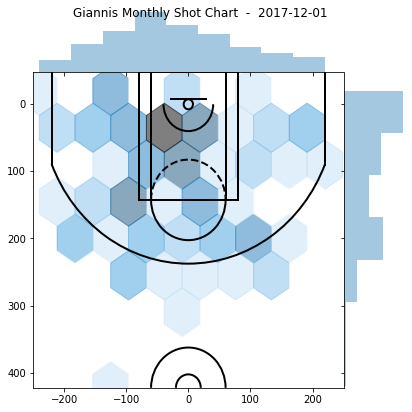

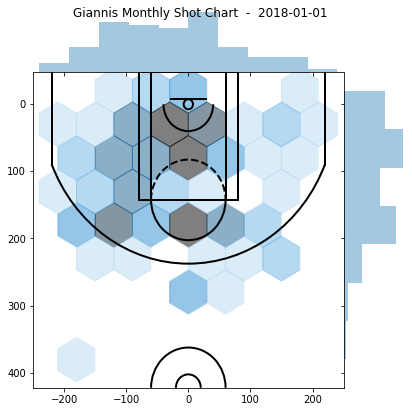

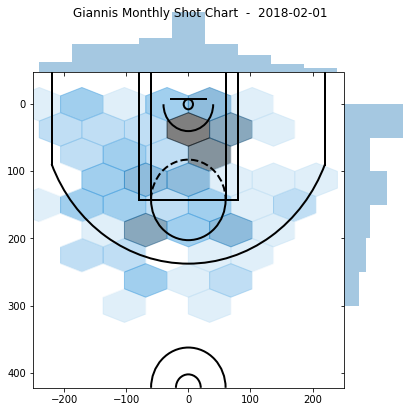

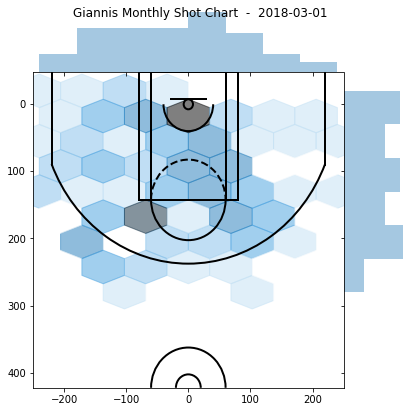

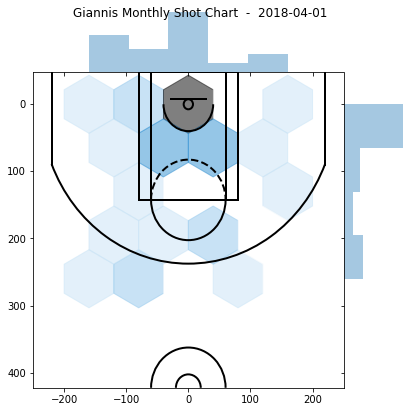

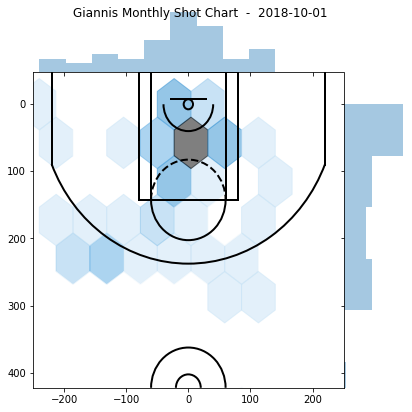

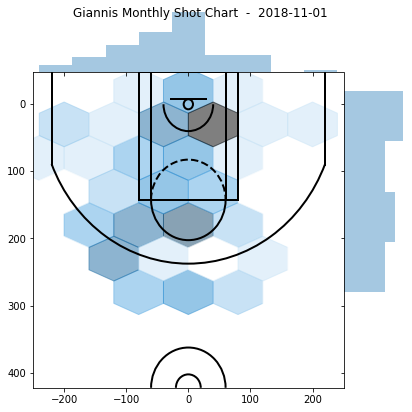

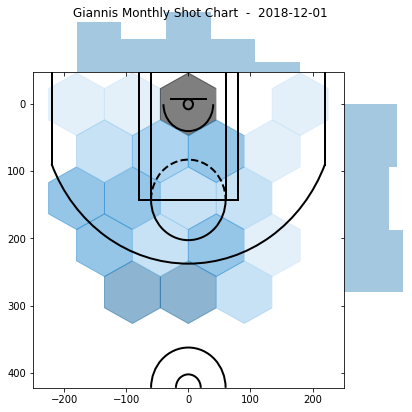

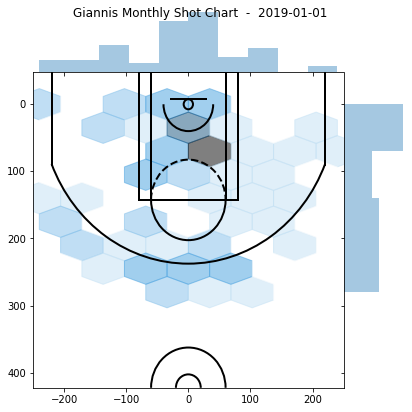

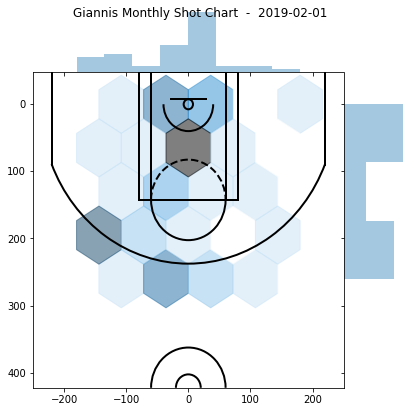

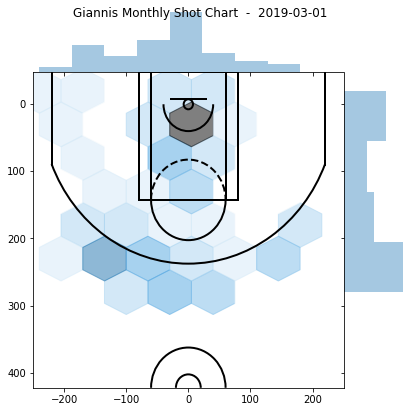

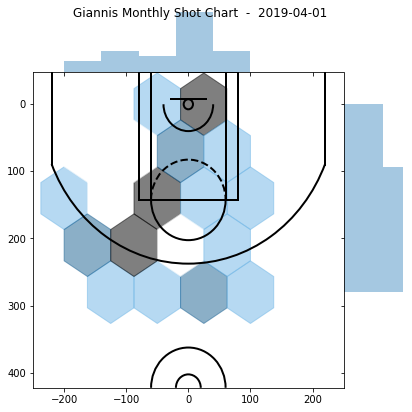

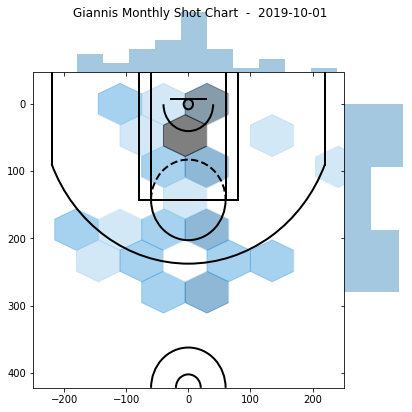

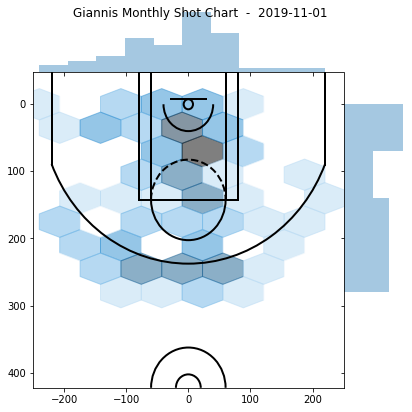

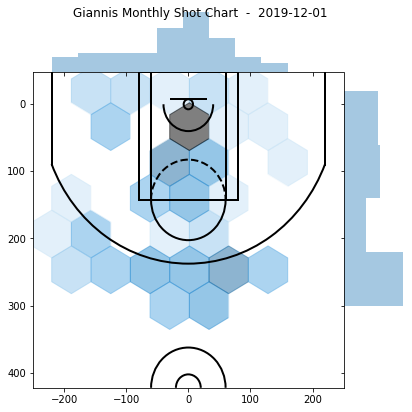

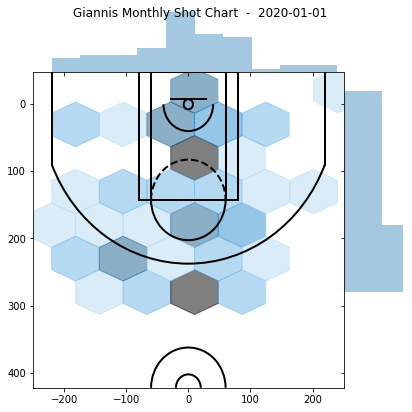

In [9]:

df['GAME_DATE_format'] = pd.to_datetime(df['GAME_DATE'], format='%Y%m%d')
df['first_of_month'] = df['GAME_DATE_format']- pd.offsets.MonthBegin(1)
tmp = df[df['PLAYER_ID']==203507][['first_of_month','LOC_X_round','LOC_Y_round']].groupby(['first_of_month','LOC_X_round','LOC_Y_round']).size().to_frame(name='count').reset_index()
pv = tmp[tmp['first_of_month']=='2017-12-01'].pivot_table(columns='LOC_X_round',index='LOC_Y_round' ,values='count').fillna(0)

first_of_months = tmp['first_of_month'].unique()
filenames = []

for fom in first_of_months: 
    tmp_spec = tmp[tmp['first_of_month']==fom]
    joint_shot_chart = sns.jointplot(tmp_spec.LOC_X_round, tmp_spec.LOC_Y_round, stat_func=None,
                                 kind='hex', space=0, alpha=0.5)
    ax = joint_shot_chart.ax_joint

    draw_court(ax)

    # Adjust the axis limits and orientation of the plot in order
    # to plot half court, with the hoop by the top of the plot
    ax.set_xlim(-250,250)
    ax.set_ylim(422.5, -47.5)

    # Get rid of axis labels and tick marks
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelbottom='off', labelleft='off')
    plt.suptitle('Giannis Monthly Shot Chart  -  ' + str(fom)[:10])
#     plt.show()
    img_name = 'files/figs_to_gifs/{}'.format(str(fom)[:10])
    filenames.append(img_name)
    plt.savefig(img_name)
    


import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename + '.png'))
imageio.mimsave('movie.gif', images,duration=2)




MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


fig size: 72.0 DPI, size in inches [6. 4.]
timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 0


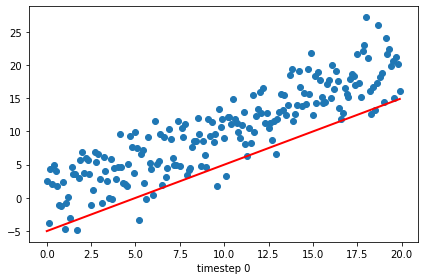

In [31]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
#     if len(sys.argv) > 1 and sys.argv[1] == 'save':
    anim.save('line.gif', dpi=80, writer='imagemagick')
#     else:
#         # plt.show() will just loop the animation forever.
#         plt.show()